### **Ayberk Demirkanat**

# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
 # Import the Iris data from sklearn library
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])          # First 50 rows Class 0, 50-100 rows Class 1, 100-150 rows Class 2
#print(iris.data)                # Printing whole data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
# Import ready method to split the data in training and testing dataset
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # Adjust the data as 80% of train and 20% of test set

# Printings
print(f"X shape of all data: {X.shape}")
print(f"X shape of train data: {X_train.shape}")
print(f"X shape of test data: {X_test.shape}")
#print(f"X values of training set: {X_train}")
#print(f"X values of testing set: {X_test}")

print(f"Y shape of all data: {y.shape}")
print(f"Y shape of train data: {y_train.shape}")
print(f"Y shape of test data: {y_test.shape}")
#print(f"y values of training set: {y_train}")
#print(f"y values of testing set: {y_test}")

X shape of all data: (150, 4)
X shape of train data: (120, 4)
X shape of test data: (30, 4)
Y shape of all data: (150,)
Y shape of train data: (120,)
Y shape of test data: (30,)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC

# Implementing the SVM
SVMmodel = SVC(kernel='linear')   # Using linear kernel
SVMmodel.fit(X_train,y_train)     # Training the model on the training data
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)     # Checking the results on the testing data

0.9666666666666667

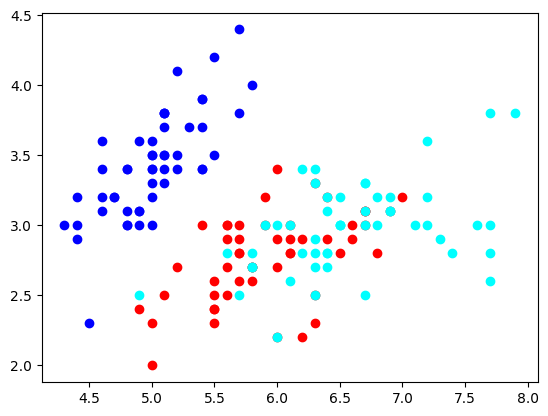

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(X[:,0],[:,1])
plt.scatter(X[y==0,0], X[y==0,1], color='blue')        # Class 0
plt.scatter(X[y==1,0], X[y==1,1], color='red')         # Class 1
plt.scatter(X[y==2,0], X[y==2,1], color='cyan')        # Class 2
plt.show()

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
# Choosing only first two features
X = iris.data[:,0:2]  # NumPy slicing to obtain only 2 features (columns)
print(f"New X shape is: {X.shape}")

New X shape is: (150, 2)


In [ ]:
# Filtering out the Class 2
mask = iris.target != 2
X_filtered = iris.data[mask, :2]  # Apply mask  to rows before selecting columns
y_filtered = iris.target[mask]

# Checking the shape of filtered dataset
print(f"Shape of X_filtered: {X_filtered.shape}")
print(f"Shape of y_filtered: {y_filtered.shape}")


Shape of X_filtered: (100, 2)
Shape of y_filtered: (100,)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

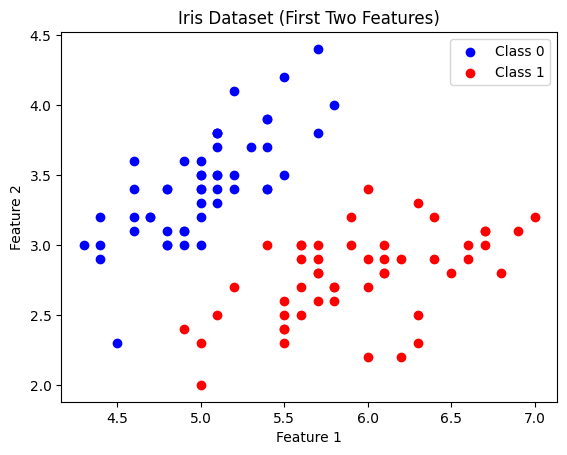

In [ ]:
# Plot the filtered data only Class 0 and Class 1
plt.scatter(X_filtered[y_filtered == 0][:, 0], X_filtered[y_filtered == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], color='red', label='Class 1')

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Iris Dataset (First Two Features)")
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
# Train - test data adjustements
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_filtered, y_filtered, test_size=0.2)        # 80% Train - 20% Test

# Implementing the SVM model with linear kernel and C = 200
SVMmodel_1=SVC(kernel='linear', C=200)
SVMmodel_1.fit(Xf_train,yf_train) # Training the model on training set

SVMmodel_1.get_params()
SVMmodel_1.score(Xf_test,yf_test)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

SCM Model Coefficients: [[ 5.00103225 -5.0002675 ]]
W is : [ 5.00103225 -5.0002675 ]
b is : -11.00462641632069



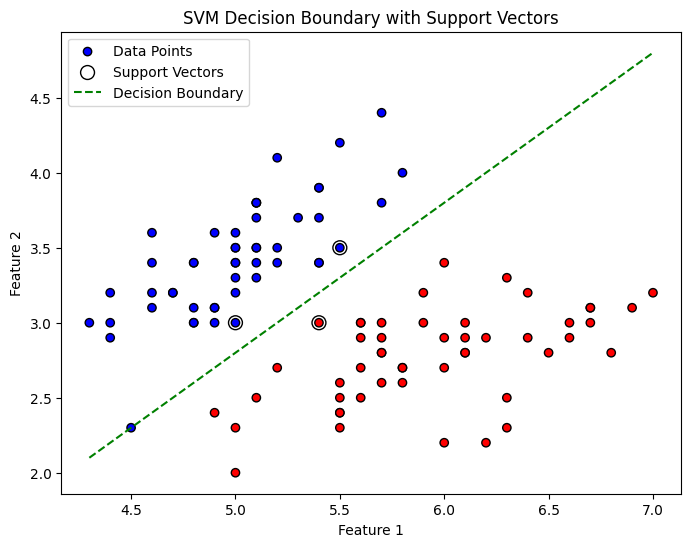

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

supvectors = SVMmodel_1.support_vectors_

# Separating line coefficients
print(f"SCM Model Coefficients: {SVMmodel_1.coef_}")
W = SVMmodel_1.coef_[0]        # Take the first row (?)
b = SVMmodel_1.intercept_[0]

# Print the W and b values
print(f"W is : {W}")
print(f"b is : {b}",end="\n\n")

# Determine the range of the X1
x1 = np.linspace(min(X_filtered[:, 0]), max(X_filtered[:, 0]), 100)

# Determine the seperation line: W1*x + W2*y + b = 0 --> y = (-W1/W2) * x - (b/W2)
x2 = (-W[0] / W[1]) * x1 - (b / W[1])

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap='bwr', edgecolors='k', label="Data Points")           # The dataset itself
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")       # The suppport vector representation
plt.plot(x1, x2, 'g--', label="Decision Boundary")                                                                       # The seperation line

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("SVM Decision Boundary with Support Vectors")
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

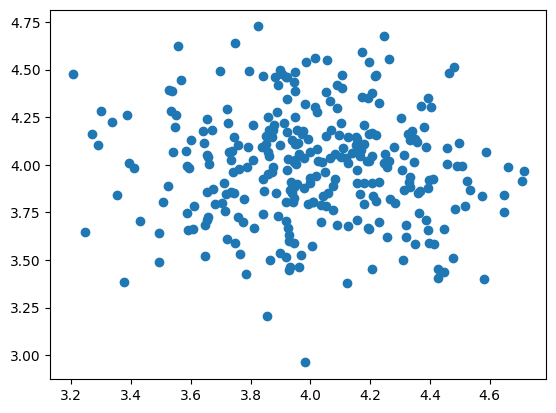

In [ ]:
from sklearn.svm import OneClassSVM                 # OneClassSVM is the SVM for the one class :)
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11) # In order to get same randomness everytime
x, _ = make_blobs(n_samples=300, centers=1, cluster_std = 0.3, center_box=(4, 4))        # Sklearn library in order to generate a random data

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

The first 10 predictions: [1 1 1 1 1 1 1 1 1 1]
Total Anomalies found: 7
Anomaly index: (array([ 12,  78,  97, 100, 162, 285, 296]),)

Outliers: [[3.85463046 3.20400443]
 [3.20576064 4.47847741]
 [3.82382713 4.72625839]
 [3.3759303  3.38448149]
 [3.98286354 2.96191517]
 [3.24757202 3.64447515]
 [4.57987163 3.40192854]]



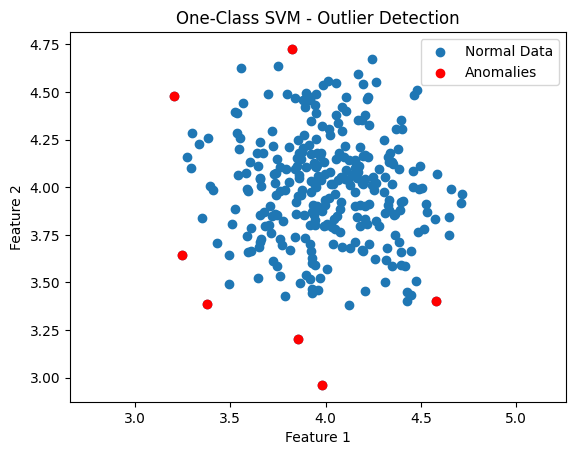

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)       # Radial Basis Function
SVMmodelOne.fit(x)

pred = SVMmodelOne.predict(x)    # Making the predictions, labels 1 as the correct data and -1 as the anomaly
anom_index = where(pred == -1)   # Locating the anomalies's indexes
values = x[anom_index]           # The values of these outliers (anomalies)

# Printing
print(f"The first 10 predictions: {pred[:10]}")
print(f"Total Anomalies found: {len(values)}")
print(f"Anomaly index: {anom_index}",end="\n\n")
print(f"Outliers: {values}", end="\n\n")

# Plotting the points
plt.scatter(x[:,0], x[:,1],  label = "Normal Data")                       # Plotting the normal Data
plt.scatter(values[:,0], values[:,1], color = 'red', label = "Anomalies") # Plotting the anomalies/outliers

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("One-Class SVM - Outlier Detection")
plt.axis('equal')
plt.show()




Plot the support vectors:

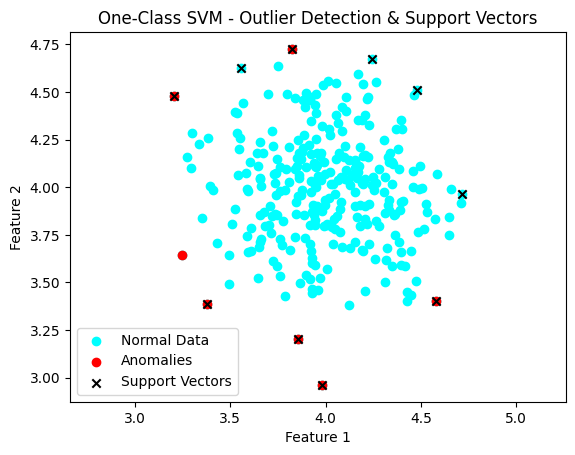

In [ ]:
# Destek vektörlerini al
support_vectors = SVMmodelOne.support_vectors_

# Görselleştirme
plt.scatter(x[:,0], x[:,1], color='cyan', label="Normal Data")
plt.scatter(values[:,0], values[:,1], color='red', label="Anomalies")
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='black', marker='x', label="Support Vectors")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("One-Class SVM - Outlier Detection & Support Vectors")
plt.axis('equal')
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Threshhold is : 8.989098620408397



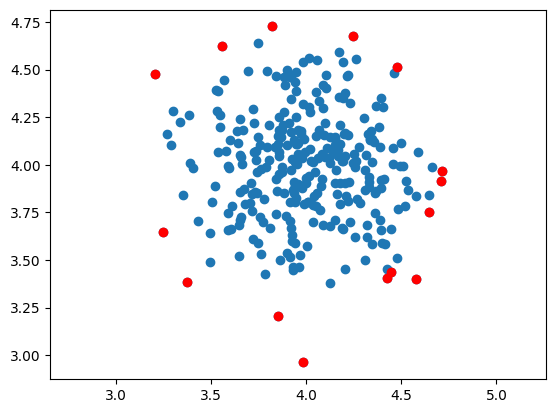

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, .05)
print(f"Threshhold is : {thresh}", end="\n\n")
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()